## Feature Engineering
Feature engineering is an important area in the field of machine learning and data analysis. It helps in data cleaning process where data scientists and analysts spend most of their time on. Here are few examples of feature engineering techniques, 

1. Outlier detection and removal
    - Percentile
    - Standard deviation
    - Inter Quatile Range (IQR)
2. One hot encoding 
3. Log transform 
4. Dimensionality reduction using principal component analysis (a.k.a. PCA) 
5. Handling missing values 
6. Scaling 
7. Normalization or standardization
8. Handling Unicode


## 1. Remove Outliers

### 1-1. Outlier removal using Percentile

In [1]:
import pandas as pd

df=pd.read_csv('./data/heights.csv')
df.head()

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9


In [2]:
max_threshold=df['height'].quantile(0.95)
max_threshold

9.689999999999998

In [3]:
min_threshold=df['height'].quantile(0.05)
min_threshold

3.6050000000000004

In [4]:
df1=df[(min_threshold<df['height']) & (df['height'] < max_threshold)]
df1

,name,height
0,mohan,5.9
1,maria,5.2
2,sakib,5.1
3,tao,5.5
4,virat,4.9
5,khusbu,5.4
6,dmitry,6.2
7,selena,6.5
8,john,7.1
10,jose,6.1


### Another example of removing outlier using quantile

In [5]:
df=pd.read_csv('./data/bhp.csv') # bhp: banglore home price
df.head()

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [6]:
df.describe()

,total_sqft,bath,price,bhk,price_per_sqft
count,13200.000000,13200.000000,13200.000000,13200.000000,1.320000e+04
mean,1555.302783,2.691136,112.276178,2.800833,7.920337e+03
std,1237.323445,1.338915,149.175995,1.292843,1.067272e+05
min,1.000000,1.000000,8.000000,1.000000,2.670000e+02
25%,1100.000000,2.000000,50.000000,2.000000,4.267000e+03
50%,1275.000000,2.000000,71.850000,3.000000,5.438000e+03
75%,1672.000000,3.000000,120.000000,3.000000,7.317000e+03
max,52272.000000,40.000000,3600.000000,43.000000,1.200000e+07


### Remove samples that are above 99.90% percentile and below 0.1% percentile rank

In [7]:
min_th, max_th=df['price_per_sqft'].quantile([0.001, 0.999])
min_th, max_th

(1366.184, 50959.36200000098)

In [8]:
df[(df['price_per_sqft'] < min_th) | (df['price_per_sqft'] > max_th)].shape

(28, 7)

In [9]:
# Remove outliers
df2=df[(min_th < df['price_per_sqft']) & (df['price_per_sqft'] < max_th)]
df2

,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250
...,...,...,...,...,...,...,...
13195,Whitefield,5 Bedroom,3453.0,4.0,231.00,5,6689
13196,other,4 BHK,3600.0,5.0,400.00,4,11111
13197,Raja Rajeshwari Nagar,2 BHK,1141.0,2.0,60.00,2,5258
13198,Padmanabhanagar,4 BHK,4689.0,4.0,488.00,4,10407


## 1-2. Outlier removal using standard deviation

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize']=(10, 6)

In [11]:
df=pd.read_csv('./data/weight-height.csv')
df.shape

(10000, 3)

In [12]:
df.head()

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801


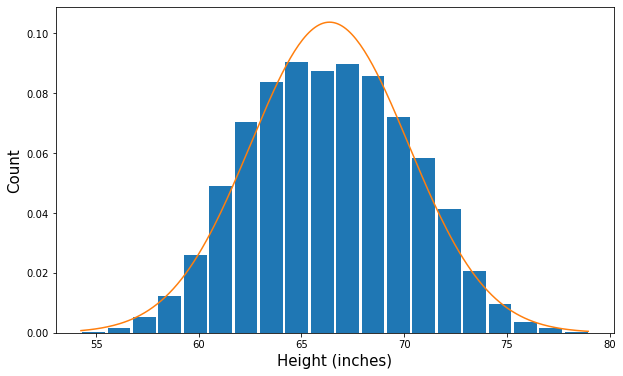

In [13]:
import numpy as np
from scipy.stats import norm 
plt.hist(df['Height'], bins=20, rwidth=0.9, density=True)
plt.xlabel('Height (inches)', fontsize=15)
plt.ylabel('Count', fontsize=15)

rng=np.arange(df['Height'].min(), df['Height'].max(), 0.1)

plt.plot(rng, norm.pdf(rng, df['Height'].mean(), df['Height'].std()))
plt.show()

## 1-2-1. Outlier detection and removal using 3 standard deviation

The Empirical Rule states that 99.7% of data observed following a normal distribution lies within 3 standard deviations from the mean. Under this rule, 68% of the data falls within one standard deviation, 95% percent within two standard deviations, and 99.7% within three standard deviations from the mean

In [14]:
upper_limit=df['Height'].mean() + 3*df['Height'].std()
upper_limit

77.91014411714076

In [15]:
lower_limit=df['Height'].mean() - 3*df['Height'].std()
lower_limit

54.82497539250136

In [16]:
df_removal_outlier_3std=df[(lower_limit<df['Height']) & (df['Height']<upper_limit)]
df_removal_outlier_3std

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [17]:
counts_outliers=df.shape[0]-df_removal_outlier_3std.shape[0]
print(counts_outliers)

7


## 1-2-1. Outlier dectection and removal using Z score
Z score is a way to achieve same thing that we did above in part
Z score indicates how many standard deviation away a data point is.
For example in our case mean is 66.37 and standard deviation is 3.84.
If a value of a data point is 77.91 then Z score for that is 3 because it is 3 standard deviation away (77.91 = 66.37 + 3 * 3.84)

z=(x-$mu$)/$sigma$

In [18]:
df['zscore'] = ( df['Height'] - df['Height'].mean() ) / df['Height'].std()
df.head(5)

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


In [19]:
outliers=df[(df['zscore']<-3) | (df['zscore']>3)]
outliers

,Gender,Height,Weight,zscore
994,Male,78.095867,255.690835,3.048271
1317,Male,78.462053,227.342565,3.143445
2014,Male,78.998742,269.989699,3.282934
3285,Male,78.528210,253.889004,3.160640
3757,Male,78.621374,245.733783,3.184854
6624,Female,54.616858,71.393749,-3.054091
9285,Female,54.263133,64.700127,-3.146027


In [20]:
df_no_outliers = df[(-3<df.zscore) & (df.zscore<3)]
df_no_outliers.head()

,Gender,Height,Weight,zscore
0,Male,73.847017,241.893563,1.943964
1,Male,68.781904,162.310473,0.627505
2,Male,74.110105,212.740856,2.012343
3,Male,71.730978,220.042470,1.393991
4,Male,69.881796,206.349801,0.913375


## 1-3. Outlier Detection and Removal Using IQR
The interquartile range (IQR) is the length of the middle 50% of that interval of space. If you want to know that the IQR is in formal terms, the IQR is calculated as: The difference between the third or upper quartile and the first or lower quartile.
- IQR = Q3 - Q1 <br>
- Outliers < Q1-1.5\*IQR or Outliers > 1.5\*IQR + Q3 <br>
[reference](https://www.scribbr.com/statistics/interquartile-range/)

In [21]:
import pandas as pd
df = pd.read_csv('./data/weight-height.csv')
df

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [22]:
Q1 = df.Height.quantile(0.25)
Q3 = df.Height.quantile(0.75)
IQR=Q3-Q1

print(round(IQR, 2))

5.67


In [23]:
lower_limit = Q1 - 1.5*IQR
upper_limit = Q3 + 1.5*IQR
lower_limit=round(lower_limit, 2)
upper_limit=round(upper_limit,2)
lower_limit, upper_limit

(55.0, 77.68)

In [24]:
# Remove outliers
df_no_outlier = df[(lower_limit<df.Height)&(df.Height<upper_limit)]
df_no_outlier

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856
3,Male,71.730978,220.042470
4,Male,69.881796,206.349801
...,...,...,...
9995,Female,66.172652,136.777454
9996,Female,67.067155,170.867906
9997,Female,63.867992,128.475319
9998,Female,69.034243,163.852461


In [25]:
df.shape[0]-df_no_outlier.shape[0]

8

## 2. Handle Missing Data

- If data type is ***numberic***, we can replace the missing data with **mean** (when data is not skewed) or **median** (when data is skewed)
- If data type is ***categorical***, then we can replace the missing values with **mode** (the most frequently used value)

But depending on data, the method and logic of handling the missing values can be varied

In [26]:
import pandas as pd
df = pd.read_csv("./data/weather_data.csv", parse_dates=['day'])
print(type(df.day[0]))
df

<class 'pandas._libs.tslibs.timestamps.Timestamp'>


,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [27]:
df.set_index('day', inplace=True)
df

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### fill NaN with one specific value such as 0

In [28]:
df1=df.fillna(0)
df1

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,0
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,0
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### fill NaN using column names and dict

In [29]:
df2=df.fillna({'temperature': 0,
              'windspeed': 0,
              'event':'No Event'})
df2

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,0.0,9.0,Sunny
2017-01-05,28.0,0.0,Snow
2017-01-06,0.0,7.0,No Event
2017-01-07,32.0,0.0,Rain
2017-01-08,0.0,0.0,Sunny
2017-01-09,0.0,0.0,No Event
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Use method option how to fill na values

In [30]:
df3=df.fillna(method='ffill') # ffill: forward fill, take the previous value
df3

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,7.0,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [31]:
df4=df.fillna(method='bfill') # backward fill, take the behind value
df4

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,28.0,9.0,Sunny
2017-01-05,28.0,7.0,Snow
2017-01-06,32.0,7.0,Rain
2017-01-07,32.0,8.0,Rain
2017-01-08,34.0,8.0,Sunny
2017-01-09,34.0,8.0,Cloudy
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### filling method can be horizontal using axis option

In [32]:
df5=df.fillna(method='bfill', axis='columns')
df5
# here we can't use 'ffill'

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,9.0,9.0,Sunny
2017-01-05,28.0,Snow,Snow
2017-01-06,7.0,7.0,NaN
2017-01-07,32.0,Rain,Rain
2017-01-08,Sunny,Sunny,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### Use limit parameter to restrict how many missing values can be filled

In [33]:
df6=df.fillna(method='ffill', limit=1)
df6

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,NaN,Sunny
2017-01-09,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [34]:
df7=df.fillna(method='ffill', limit=2)
df7

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,32.0,9.0,Sunny
2017-01-05,28.0,9.0,Snow
2017-01-06,28.0,7.0,Snow
2017-01-07,32.0,7.0,Rain
2017-01-08,32.0,7.0,Sunny
2017-01-09,32.0,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


### fill missing values using interpolate() method
[reference](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.interpolate.html)

In [35]:
df8=df.interpolate() # default method is linear
df8

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,30.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


In [36]:
df9=df.interpolate(method='time')
df9

,temperature,windspeed,event
day,,,
2017-01-01,32.000000,6.00,Rain
2017-01-04,29.000000,9.00,Sunny
2017-01-05,28.000000,8.00,Snow
2017-01-06,30.000000,7.00,NaN
2017-01-07,32.000000,7.25,Rain
2017-01-08,32.666667,7.50,Sunny
2017-01-09,33.333333,7.75,NaN
2017-01-10,34.000000,8.00,Cloudy
2017-01-11,40.000000,12.00,Sunny


#### method ="time" fill missing values by condidering time intervals calculated between two time points, in other words, 2017-01-04 is closer to 2017-01-05 than 2018-01-01, so rather than linearly calculated value (the value averaged between two values), the value timely interploated can be more approriate.

#### There are many other methods for interpolation such as quadratic, piecewise_polynomial, cubic etc. Just google "dataframe interpolate" to see complete documentation

## dropna

In [37]:
df10=df.dropna() # drop any row which has any missing value
df10

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [38]:
df11=df.dropna(how='all') # drop the row if the row has missing values in all columns
df11

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [39]:
df12=df.dropna(thresh=1) # keep the row if the row has more than one single value
df12

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


In [40]:
df13=df.dropna(thresh=2) # keep the row if the row has more than two values
df13

,temperature,windspeed,event
day,,,
2017-01-01,32.0,6.0,Rain
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-07,32.0,NaN,Rain
2017-01-10,34.0,8.0,Cloudy
2017-01-11,40.0,12.0,Sunny


## Inserting Missing Dates

In [41]:
dt = pd.date_range('01-01-2017','01-11-2017')
idx = pd.DatetimeIndex(dt)
df14=df.reindex(idx)
df14

,temperature,windspeed,event
2017-01-01,32.0,6.0,Rain
2017-01-02,NaN,NaN,NaN
2017-01-03,NaN,NaN,NaN
2017-01-04,NaN,9.0,Sunny
2017-01-05,28.0,NaN,Snow
2017-01-06,NaN,7.0,NaN
2017-01-07,32.0,NaN,Rain
2017-01-08,NaN,NaN,Sunny
2017-01-09,NaN,NaN,NaN
2017-01-10,34.0,8.0,Cloudy


## Replace missing values

In [42]:
# import numpy as np
# df15=df.replace({'temperature':np.NaN,
#            'windspeed':np.NaN,
#            }, -99999 ).replace({'event':np.NaN}, 0)
# df15.to_csv('weather_1.csv')


In [43]:
df16=pd.read_csv('./data/weather_1.csv')
df16

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,-99999.0,9.0,Sunny
2,2017-01-05,28.0,-99999.0,Snow
3,2017-01-06,-99999.0,7.0,0
4,2017-01-07,32.0,-99999.0,Rain
5,2017-01-08,-99999.0,-99999.0,Sunny
6,2017-01-09,-99999.0,-99999.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### replace  a single value

In [44]:
import numpy as np
df16.replace(-99999, np.nan)

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,0
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [45]:
df17=pd.read_csv('./data/weather_2.csv')
df17

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,-99999.0,9.0,Sunny
2,2017-01-05,28.0,-88888.0,Snow
3,2017-01-06,-99999.0,7.0,0
4,2017-01-07,32.0,-88888.0,Rain
5,2017-01-08,-99999.0,-88888.0,Sunny
6,2017-01-09,-99999.0,-88888.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### replace list with  single vlue

In [46]:
df18=df17.replace(to_replace=[-99999, -88888], value=0)
df18

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,0.0,9.0,Sunny
2,2017-01-05,28.0,0.0,Snow
3,2017-01-06,0.0,7.0,0
4,2017-01-07,32.0,0.0,Rain
5,2017-01-08,0.0,0.0,Sunny
6,2017-01-09,0.0,0.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### replace per column

In [47]:
df16.replace({'temperature':-99999, 
              'windspeed': -99999,
             'event':'0'}, np.nan)

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,NaN
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,NaN
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### replace using mapping

In [48]:
df16.replace({-99999:np.nan,
             '0':'Sunny'})

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,NaN,9.0,Sunny
2,2017-01-05,28.0,NaN,Snow
3,2017-01-06,NaN,7.0,Sunny
4,2017-01-07,32.0,NaN,Rain
5,2017-01-08,NaN,NaN,Sunny
6,2017-01-09,NaN,NaN,Sunny
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### replace using regex

In [49]:
# when windspeed is 6 mph, 7 mph etc. & temperature is 32 F, 28 F etc.

df=pd.read_csv('./data/weather_3.csv')
df

,day,temperature,windspeed,event
0,2017-01-01,32.0 F,6.0 mph,Rain
1,2017-01-04,-99999.0,9.0 mph,Sunny
2,2017-01-05,28.0 C,-88888.0,Snow
3,2017-01-06,-99999.0,7.0 mph,0
4,2017-01-07,32.0,-88888.0,Rain
5,2017-01-08,-99999.0,-88888.0,Sunny
6,2017-01-09,-99999.0,-88888.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


In [50]:
df.replace({'temperature': '\s[A-Za-z]',
           'windspeed':'\s[a-z]+'}, '', regex=True)

,day,temperature,windspeed,event
0,2017-01-01,32.0,6.0,Rain
1,2017-01-04,-99999.0,9.0,Sunny
2,2017-01-05,28.0,-88888.0,Snow
3,2017-01-06,-99999.0,7.0,0
4,2017-01-07,32.0,-88888.0,Rain
5,2017-01-08,-99999.0,-88888.0,Sunny
6,2017-01-09,-99999.0,-88888.0,0
7,2017-01-10,34.0,8.0,Cloudy
8,2017-01-11,40.0,12.0,Sunny


### replace list with another list

In [51]:
df = pd.DataFrame({
    'score': ['exceptional','average', 'good', 'poor', 'average', 'exceptional'],
    'student': ['rob', 'maya', 'parthiv', 'tom', 'julian', 'erica']
})
df

,score,student
0,exceptional,rob
1,average,maya
2,good,parthiv
3,poor,tom
4,average,julian
5,exceptional,erica


In [52]:
df.replace(['poor', 'average', 'good', 'exceptional'], [1,2,3,4])

,score,student
0,4,rob
1,2,maya
2,3,parthiv
3,1,tom
4,2,julian
5,4,erica


## 3. Log Transformation
Logarithm is an inverse of an exponent

log<sub>10</sub><sup>1</sup>=1 <br>
log<sub>10000000</sub>=log<sub>10</sub><sup>7</sup>=7 <br>

As shown above, the difference of two values is  9,999,990 so it is very difficult to plot the two values on the same axis but if we take log scale we can easily plot them on the same axis

In [53]:
import pandas as pd

df=pd.read_csv('./data/revenue.csv')
df

,company,revenue
0,Tesla,31.0
1,UBER,11.0
2,Amazon,386.0
3,Jindal Steel,4.7
4,Axis Bank,5.6
5,Vedanta,11.3


<AxesSubplot:xlabel='company'>

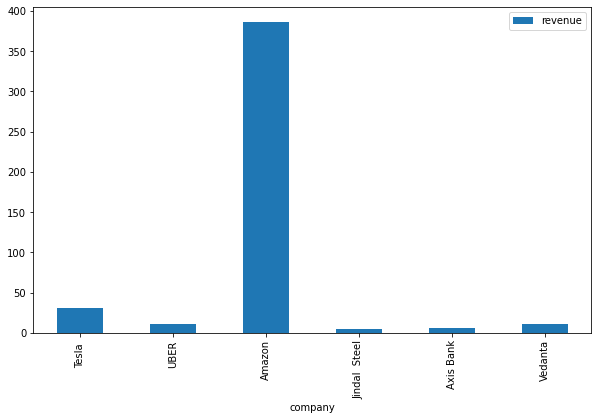

In [54]:
df.plot(x='company', y='revenue', kind='bar')

### It is very hard to compare the revenues between companies other than Amazon

<AxesSubplot:xlabel='company'>

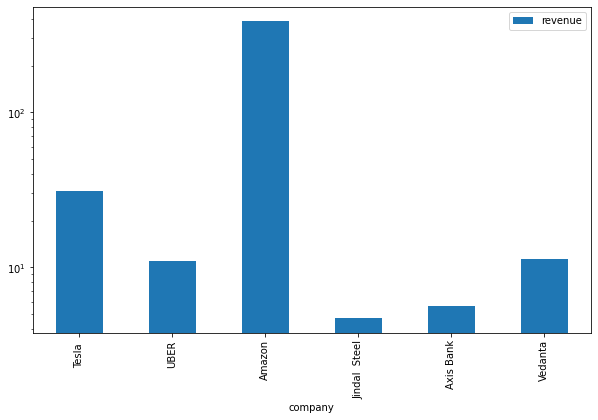

In [55]:
df.plot(x='company', y='revenue', kind='bar', logy=True) 
# By taking log sacle, now we can get better comparsion between companies

In [56]:
df1=df.assign(log_scaled=lambda x:np.log10(x.revenue))
df1

,company,revenue,log_scaled
0,Tesla,31.0,1.491362
1,UBER,11.0,1.041393
2,Amazon,386.0,2.586587
3,Jindal Steel,4.7,0.672098
4,Axis Bank,5.6,0.748188
5,Vedanta,11.3,1.053078


<AxesSubplot:xlabel='company'>

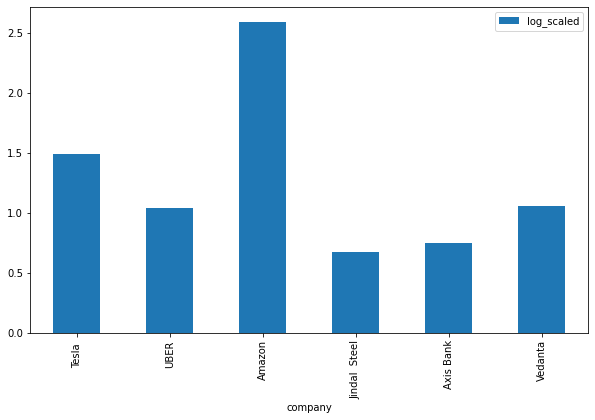

In [57]:
df1.plot(x='company', y='log_scaled', kind='bar')

## 4. One hot encoding

For data analysis, the categorical data needs to be converted to numeric data, otherwise, we will get an error if we try to plug these categorical variables into most machine learning models in Python without "encoding" them first. 

In [58]:
import pandas as pd
def load_data():
    return pd.read_csv('./data/train.csv')

df=load_data()
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


### Create a One-Hot encoding

In [59]:
pd.get_dummies(df.Sex)

,female,male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [60]:
pd.get_dummies(df.Sex, drop_first=True)

,male
0,1
1,0
2,0
3,0
4,1
...,...
886,1
887,0
888,0
889,1


In [61]:
pd.get_dummies(df.Sex, prefix='Sex')

,Sex_female,Sex_male
0,0,1
1,1,0
2,1,0
3,1,0
4,0,1
...,...,...
886,0,1
887,1,0
888,1,0
889,0,1


In [62]:
df.Embarked.value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [63]:
pd.get_dummies(df.Embarked, prefix='Embarked')

,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1
1,1,0,0
2,0,0,1
3,0,0,1
4,0,0,1
...,...,...,...
886,0,0,1
887,0,0,1
888,0,0,1
889,1,0,0


In [64]:
# Attach dummies to the dataframe

embarked_dummies=pd.get_dummies(df.Embarked, prefix='Embarked')
df=pd.concat([df, embarked_dummies], axis=1)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0,0,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0,0,1


In [65]:
df=load_data()
df=pd.get_dummies(df, columns=['Sex', 'Embarked'])
df

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",27.0,0,0,211536,13.0000,NaN,0,1,0,0,1
887,888,1,1,"Graham, Miss. Margaret Edith",19.0,0,0,112053,30.0000,B42,1,0,0,0,1
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",NaN,1,2,W./C. 6607,23.4500,NaN,1,0,0,0,1
889,890,1,1,"Behr, Mr. Karl Howell",26.0,0,0,111369,30.0000,C148,0,1,1,0,0


## 5. Scaling: StandardScaler and MinMaxScaler
Many machine learning algorithms perform better when numerical input variables are scaled to a standard range.

This includes algorithms that use a weighted sum of the input, like linear regression, and algorithms that use distance measures, like k-nearest neighbors.

The two most popular techniques for scaling numerical data prior to modeling are normalization and standardization. Normalization scales each input variable separately to the range 0-1, which is the range for floating-point values where we have the most precision. Standardization scales each input variable separately by subtracting the mean (called centering) and dividing by the standard deviation to shift the distribution to have a mean of zero and a standard deviation of one.

[reference](https://machinelearningmastery.com/standardscaler-and-minmaxscaler-transforms-in-python/)

### 5-1. Data Normalization
A value is normalized as follows:

- y = (x – min) / (max – min)

In [66]:
# example of a normalization
import numpy as np
from sklearn.preprocessing import MinMaxScaler
# define data
data = np.array([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [67]:
# define min max scaler
scaler = MinMaxScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[1.         0.        ]
 [0.04166667 0.49494949]
 [0.47916667 0.04040404]
 [0.875      0.6969697 ]
 [0.         1.        ]]


### 5-2. Data Standardization
Standardizing a dataset involves rescaling the distribution of values so that the mean of observed values is 0 and the standard deviation is 1.

- A value is standardized as follows:

y = (x – mean) / standard_deviation

In [68]:
# example of a standardization
import numpy as np
from sklearn.preprocessing import StandardScaler
# define data
data = np.array([[100, 0.001],
                [8, 0.05],
                [50, 0.005],
                [88, 0.07],
                [4, 0.1]])
print(data)

[[1.0e+02 1.0e-03]
 [8.0e+00 5.0e-02]
 [5.0e+01 5.0e-03]
 [8.8e+01 7.0e-02]
 [4.0e+00 1.0e-01]]


In [69]:
# define standard scaler
scaler = StandardScaler()
# transform data
scaled = scaler.fit_transform(data)
print(scaled)

[[ 1.26398112 -1.16389967]
 [-1.06174414  0.12639634]
 [ 0.         -1.05856939]
 [ 0.96062565  0.65304778]
 [-1.16286263  1.44302493]]


### Sonar Dataset
The sonar dataset is a standard machine learning dataset for binary classification.

It involves 60 real-valued inputs and a two-class target variable. There are 208 examples in the dataset and the classes are reasonably balanced.

A baseline classification algorithm can achieve a classification accuracy of about 53.4 percent using repeated stratified 10-fold cross-validation. Top performance on this dataset is about 88 percent using repeated stratified 10-fold cross-validation.

The dataset describes radar returns of rocks or simulated mines.

In [70]:
# load and summarize the sonar dataset
import pandas as pd
import matplotlib.pyplot as plt

# Load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [71]:
# summarize the shape of the dataset
print(df.shape)

# summarize each variable
print(df.describe())

(208, 61)
               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.029164    0.038437    0.043832    0.053892    0.075202    0.104570   
std      0.022991    0.032960    0.038428    0.046528    0.055552    0.059105   
min      0.001500    0.000600    0.001500    0.005800    0.006700    0.010200   
25%      0.013350    0.016450    0.018950    0.024375    0.038050    0.067025   
50%      0.022800    0.030800    0.034300    0.044050    0.062500    0.092150   
75%      0.035550    0.047950    0.057950    0.064500    0.100275    0.134125   
max      0.137100    0.233900    0.305900    0.426400    0.401000    0.382300   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.121747    0.134799    0.178003    0.208259  ...    0.016069   
std      0.061788    0.085152    0.118

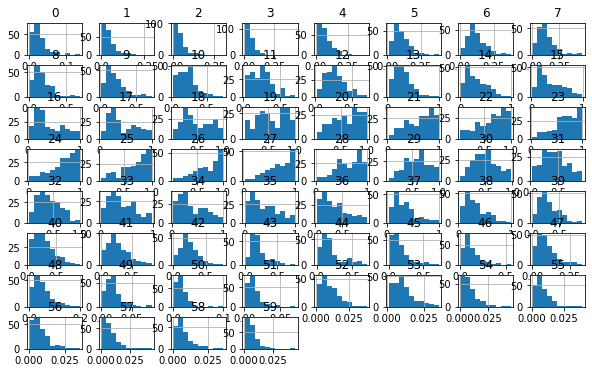

In [72]:
# histograms of the variables
df.hist()
plt.show()

<AxesSubplot:>

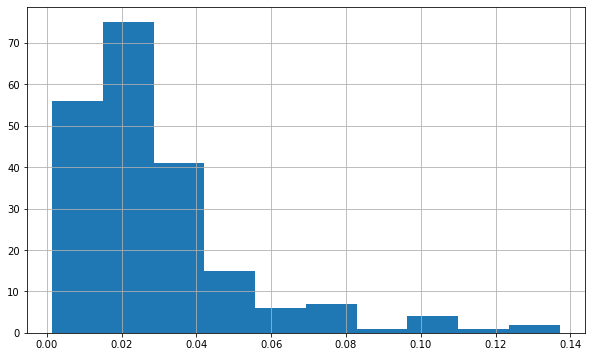

In [73]:
df[0].hist()

In [74]:
print(len(df.columns))

k=1
for i in range(8):
    for j in range(8):
        print(f'({i}, {j})={j+k-1})') 
    k=k+8
    
print()

61
(0, 0)=0)
(0, 1)=1)
(0, 2)=2)
(0, 3)=3)
(0, 4)=4)
(0, 5)=5)
(0, 6)=6)
(0, 7)=7)
(1, 0)=8)
(1, 1)=9)
(1, 2)=10)
(1, 3)=11)
(1, 4)=12)
(1, 5)=13)
(1, 6)=14)
(1, 7)=15)
(2, 0)=16)
(2, 1)=17)
(2, 2)=18)
(2, 3)=19)
(2, 4)=20)
(2, 5)=21)
(2, 6)=22)
(2, 7)=23)
(3, 0)=24)
(3, 1)=25)
(3, 2)=26)
(3, 3)=27)
(3, 4)=28)
(3, 5)=29)
(3, 6)=30)
(3, 7)=31)
(4, 0)=32)
(4, 1)=33)
(4, 2)=34)
(4, 3)=35)
(4, 4)=36)
(4, 5)=37)
(4, 6)=38)
(4, 7)=39)
(5, 0)=40)
(5, 1)=41)
(5, 2)=42)
(5, 3)=43)
(5, 4)=44)
(5, 5)=45)
(5, 6)=46)
(5, 7)=47)
(6, 0)=48)
(6, 1)=49)
(6, 2)=50)
(6, 3)=51)
(6, 4)=52)
(6, 5)=53)
(6, 6)=54)
(6, 7)=55)
(7, 0)=56)
(7, 1)=57)
(7, 2)=58)
(7, 3)=59)
(7, 4)=60)
(7, 5)=61)
(7, 6)=62)
(7, 7)=63)



61


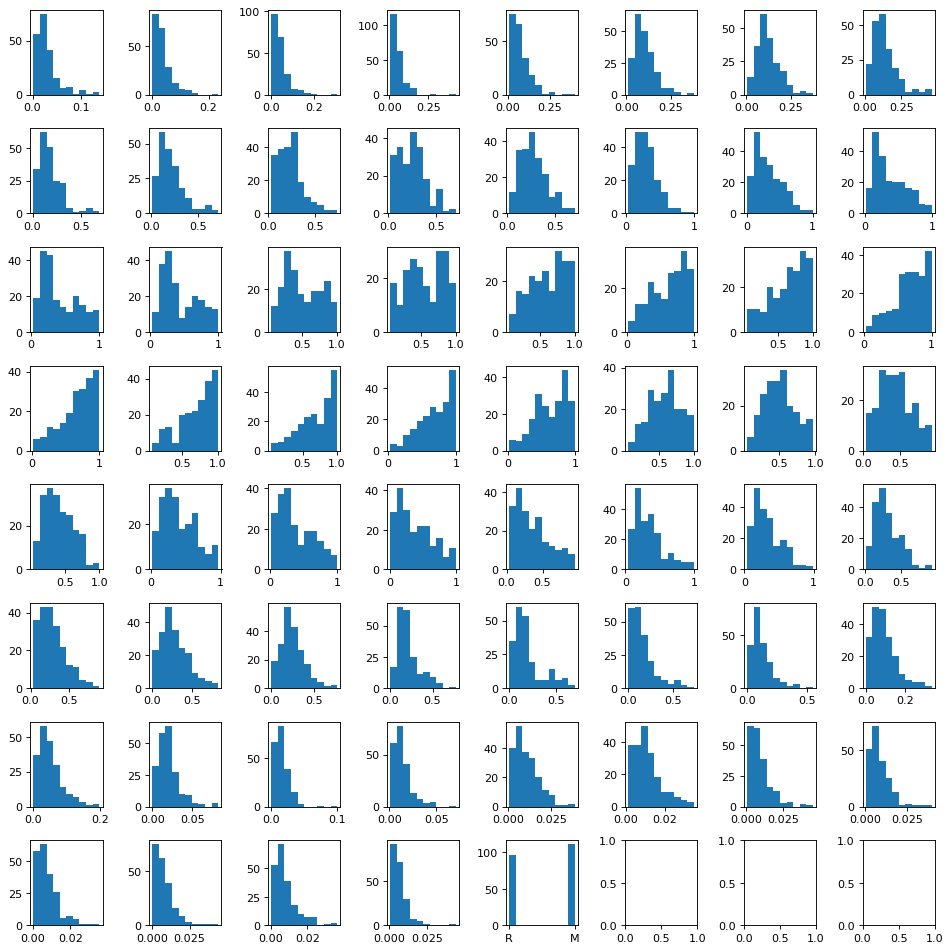

In [75]:
fig, ax=plt.subplots(nrows=8, ncols=8, figsize=(12, 12), dpi=80, tight_layout=True)
fig.subplots_adjust(hspace=0.3)

try:
    k=1
    for i in range(8):
        for j in range(8):
            ax[i, j].hist(df[j+k-1])  # df[j+k -1] brings in the corresponding column

        k=k+8
except Exception as e:
    print(e)


61


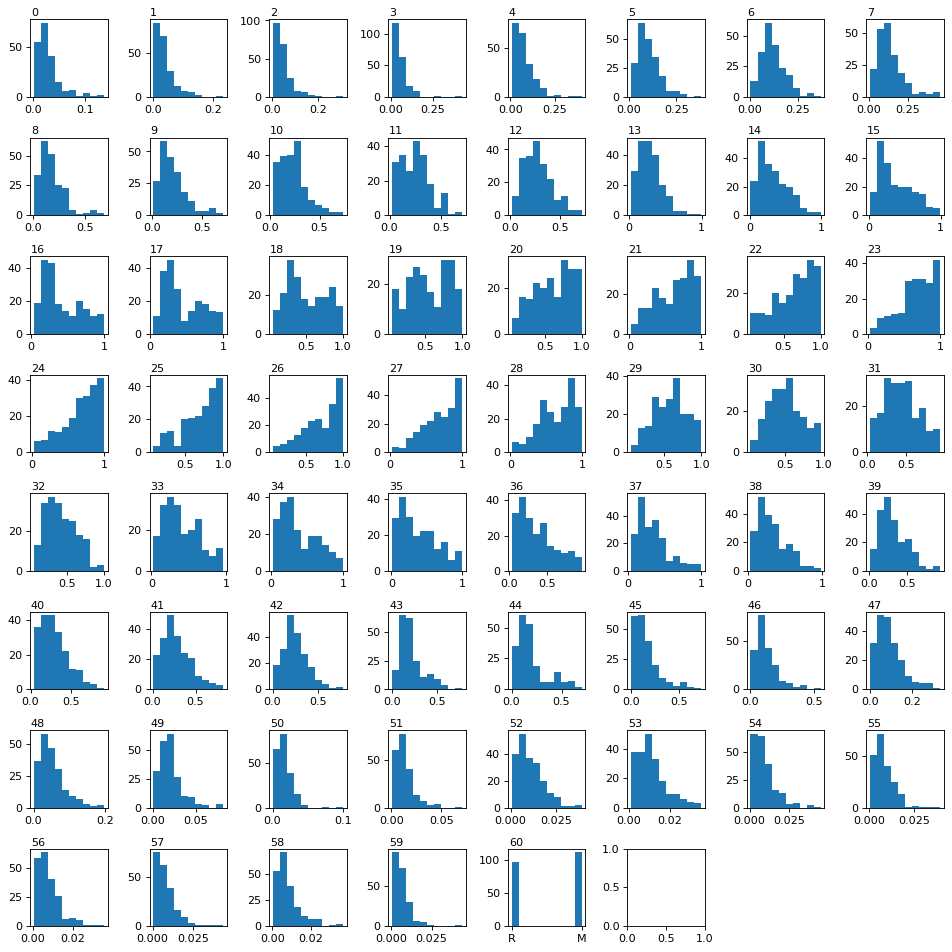

In [76]:
fig=plt.figure(figsize=(12, 12), dpi=80, tight_layout=True)

try:
    k=1
    for i in range(8):
        for j in range(8):
            ax=fig.add_subplot(8, 8, j+k)
#             ax.plot([0,1], [0,1])
            ax.hist(df[j+k-1])
            ax.text(0.01, 1.04, str(j+k-1), transform=ax.transAxes)
           
        k=k+8
except Exception as e:
    print(e)

### If we ignore the clutter of the plots and focus on the histograms themselves, we can see that many variables have a skewed distribution.

### The dataset provides a good candidate for using scaler transforms as the variables have differing minimum and maximum values, as well as different data distributions.

### Next, let’s fit and evaluate a machine learning model on the raw dataset.

### We will use a k-nearest neighbor algorithm with default hyperparameters and evaluate it using repeated stratified k-fold cross-validation. The complete example is listed below.

In [77]:
# evaluate knn on the raw sonar dataset
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
df = pd.read_csv(url, header=None)
df

,0,1,2,3,4,5,6,7,8,9,...,51,52,53,54,55,56,57,58,59,60
0,0.0200,0.0371,0.0428,0.0207,0.0954,0.0986,0.1539,0.1601,0.3109,0.2111,...,0.0027,0.0065,0.0159,0.0072,0.0167,0.0180,0.0084,0.0090,0.0032,R
1,0.0453,0.0523,0.0843,0.0689,0.1183,0.2583,0.2156,0.3481,0.3337,0.2872,...,0.0084,0.0089,0.0048,0.0094,0.0191,0.0140,0.0049,0.0052,0.0044,R
2,0.0262,0.0582,0.1099,0.1083,0.0974,0.2280,0.2431,0.3771,0.5598,0.6194,...,0.0232,0.0166,0.0095,0.0180,0.0244,0.0316,0.0164,0.0095,0.0078,R
3,0.0100,0.0171,0.0623,0.0205,0.0205,0.0368,0.1098,0.1276,0.0598,0.1264,...,0.0121,0.0036,0.0150,0.0085,0.0073,0.0050,0.0044,0.0040,0.0117,R
4,0.0762,0.0666,0.0481,0.0394,0.0590,0.0649,0.1209,0.2467,0.3564,0.4459,...,0.0031,0.0054,0.0105,0.0110,0.0015,0.0072,0.0048,0.0107,0.0094,R
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
203,0.0187,0.0346,0.0168,0.0177,0.0393,0.1630,0.2028,0.1694,0.2328,0.2684,...,0.0116,0.0098,0.0199,0.0033,0.0101,0.0065,0.0115,0.0193,0.0157,M
204,0.0323,0.0101,0.0298,0.0564,0.0760,0.0958,0.0990,0.1018,0.1030,0.2154,...,0.0061,0.0093,0.0135,0.0063,0.0063,0.0034,0.0032,0.0062,0.0067,M
205,0.0522,0.0437,0.0180,0.0292,0.0351,0.1171,0.1257,0.1178,0.1258,0.2529,...,0.0160,0.0029,0.0051,0.0062,0.0089,0.0140,0.0138,0.0077,0.0031,M
206,0.0303,0.0353,0.0490,0.0608,0.0167,0.1354,0.1465,0.1123,0.1945,0.2354,...,0.0086,0.0046,0.0126,0.0036,0.0035,0.0034,0.0079,0.0036,0.0048,M


In [78]:
df = df.values
df

array([[0.02, 0.0371, 0.0428, ..., 0.009, 0.0032, 'R'],
       [0.0453, 0.0523, 0.0843, ..., 0.0052, 0.0044, 'R'],
       [0.0262, 0.0582, 0.1099, ..., 0.0095, 0.0078, 'R'],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0077, 0.0031, 'M'],
       [0.0303, 0.0353, 0.049, ..., 0.0036, 0.0048, 'M'],
       [0.026, 0.0363, 0.0136, ..., 0.0061, 0.0115, 'M']], dtype=object)

In [79]:
df.shape

(208, 61)

In [80]:
df[:, -1]

array(['R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R', 'R',
       'R', 'R', 'R', 'R', 'R', 'R', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M',
       'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M', 'M

In [81]:
# separate into input and output columns
X, y = df[:, :-1], df[:, -1]
X

array([[0.02, 0.0371, 0.0428, ..., 0.0084, 0.009, 0.0032],
       [0.0453, 0.0523, 0.0843, ..., 0.0049, 0.0052, 0.0044],
       [0.0262, 0.0582, 0.1099, ..., 0.0164, 0.0095, 0.0078],
       ...,
       [0.0522, 0.0437, 0.018, ..., 0.0138, 0.0077, 0.0031],
       [0.0303, 0.0353, 0.049, ..., 0.0079, 0.0036, 0.0048],
       [0.026, 0.0363, 0.0136, ..., 0.0036, 0.0061, 0.0115]], dtype=object)

In [82]:
print(y)
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))

print(y)

['R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'R'
 'R' 'R' 'R' 'R' 'R' 'R' 'R' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M'
 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M' 'M']
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 

In [83]:
# define and configure the model
model = KNeighborsClassifier()

# evaluate the model
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')

# report model performance
print('Accuracy: {:.3f} ({:.3f})'.format(np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.797 (0.073)


### MinMaxScaler Transform

               0           1           2           3           4           5   \
count  208.000000  208.000000  208.000000  208.000000  208.000000  208.000000   
mean     0.204011    0.162180    0.139068    0.114342    0.173732    0.253615   
std      0.169550    0.141277    0.126242    0.110623    0.140888    0.158843   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.087389    0.067938    0.057326    0.044163    0.079508    0.152714   
50%      0.157080    0.129447    0.107753    0.090942    0.141517    0.220236   
75%      0.251106    0.202958    0.185447    0.139563    0.237319    0.333042   
max      1.000000    1.000000    1.000000    1.000000    1.000000    1.000000   

               6           7           8           9   ...          50  \
count  208.000000  208.000000  208.000000  208.000000  ...  208.000000   
mean     0.320472    0.285114    0.252485    0.281652  ...    0.160047   
std      0.167175    0.187767    0.175311    0.1

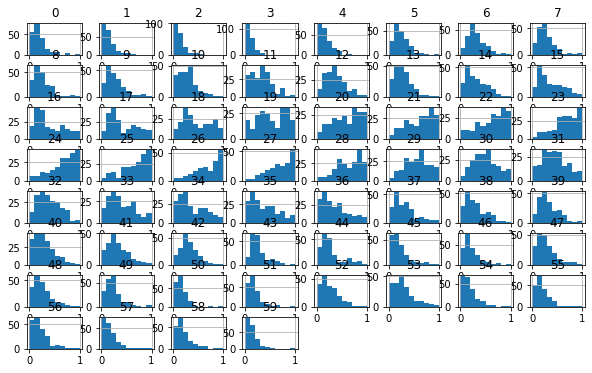

In [84]:

import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
df = pd.read_csv(url, header=None)

# retrieve just the numeric input values
data = df.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = MinMaxScaler()
data = trans.fit_transform(data)

# convert the array back to a dataframe
df = pd.DataFrame(data)

# summarize
print(df.describe())

# histograms of the variables
df.hist()
plt.show()

#### Normalized with a range from 0 to 1

60


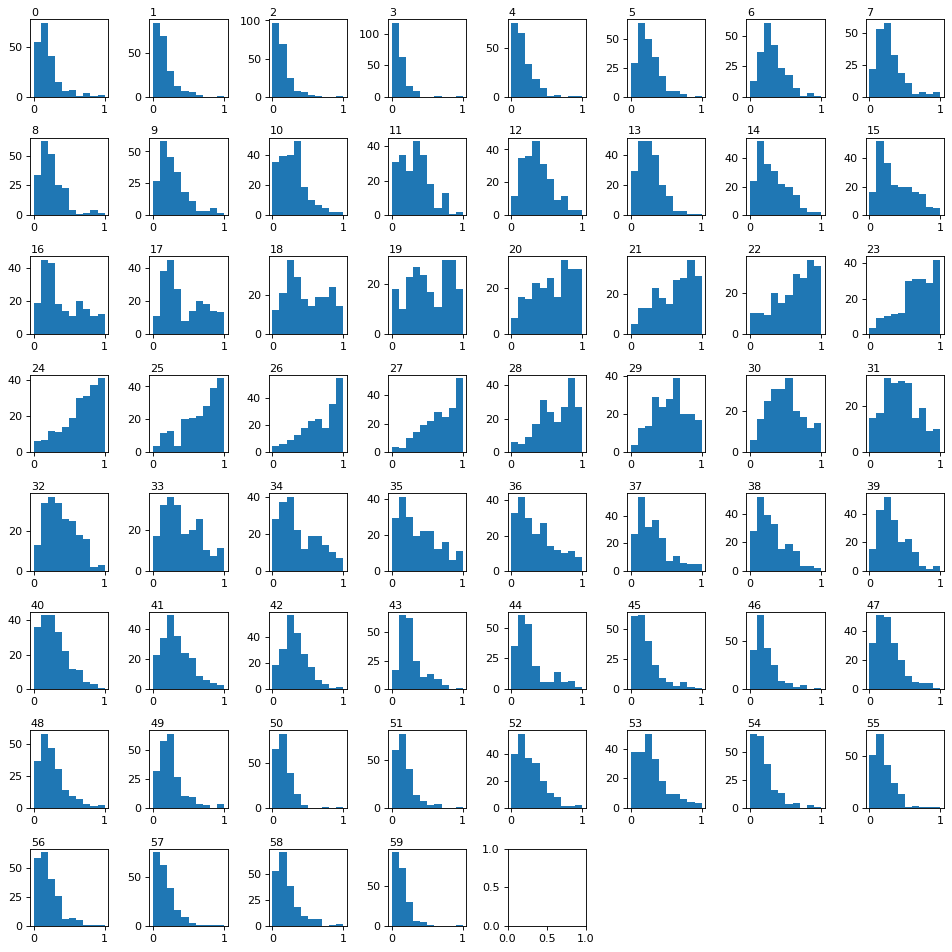

In [85]:
fig=plt.figure(figsize=(12, 12), dpi=80, tight_layout=True)

try:
    k=1
    for i in range(8):
        for j in range(8):
            ax=fig.add_subplot(8, 8, j+k)
            ax.hist(df[j+k-1])
            ax.text(0.01, 1.04, str(j+k-1), transform=ax.transAxes)
           
        k=k+8
except Exception as e:
    print(e)

### Next, let’s evaluate the same KNN model as the previous section, but in this case, on a MinMaxScaler transform of the dataset.

In [86]:
# evaluate knn on the sonar dataset with minmax scaler transform
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
df = pd.read_csv(url, header=None)
data = df.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = MinMaxScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.813 (0.085)


#### Running the example, we can see that the MinMaxScaler transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.3 percent with the transform.

### StandardScaler Transform

In [87]:
# visualize a standard scaler transform of the sonar dataset
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
df = pd.read_csv(url, header=None)

# retrieve just the numeric input values
df = df.values[:, :-1]

# perform a robust scaler transform of the dataset
trans = StandardScaler()
data = trans.fit_transform(df)

# convert the array back to a dataframe
df = pd.DataFrame(data)

# summarize
print(df.describe())

                 0             1             2             3             4   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean  -4.190024e-17  1.663333e-16 -9.661075e-17  1.627971e-16 -1.297039e-16   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00  1.002413e+00   
min   -1.206158e+00 -1.150725e+00 -1.104253e+00 -1.036115e+00 -1.236093e+00   
25%   -6.894939e-01 -6.686781e-01 -6.490624e-01 -6.359298e-01 -6.703975e-01   
50%   -2.774703e-01 -2.322506e-01 -2.486515e-01 -2.120457e-01 -2.292089e-01   
75%    2.784345e-01  2.893335e-01  3.682681e-01  2.285353e-01  4.524231e-01   
max    4.706053e+00  5.944643e+00  6.836142e+00  8.025419e+00  5.878863e+00   

                 5             6             7             8             9   \
count  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02  2.080000e+02   
mean   2.017617e-16  9.607699e-17  1.271019e-17 -3.339343e-16  2.268485e-17   
std    1.002413e+00  1.002413e+00  1.002413e+00  1.

60


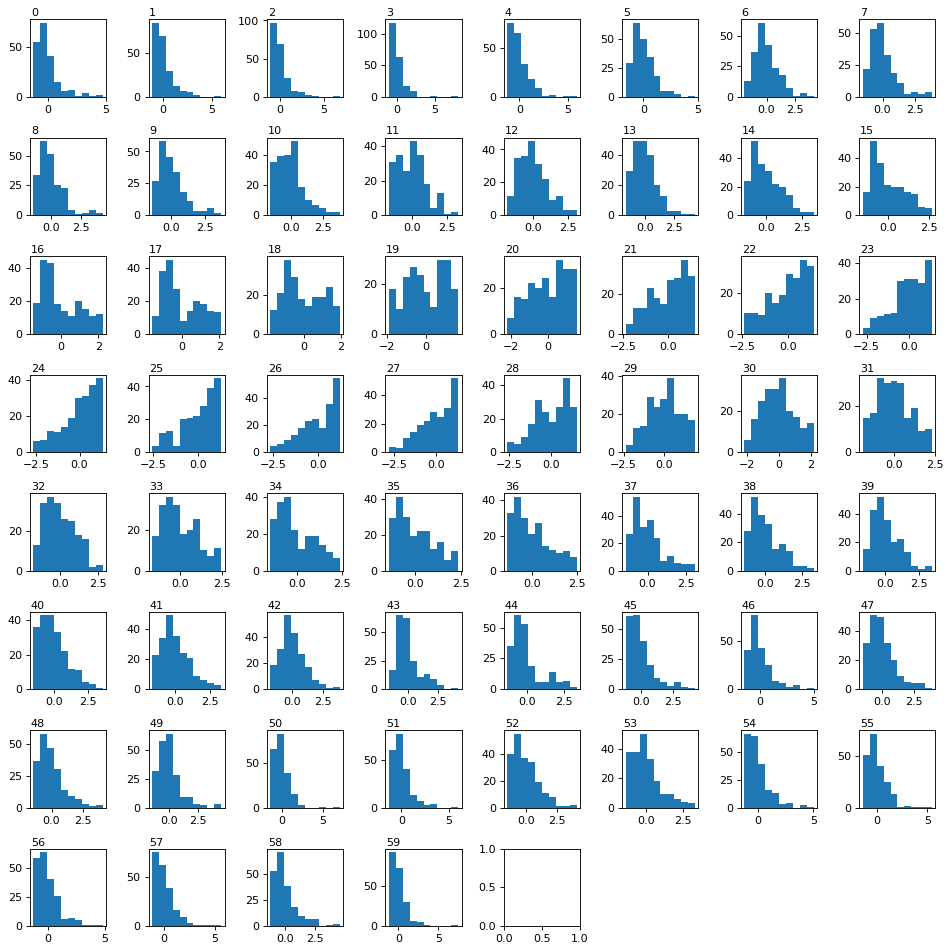

In [88]:
# histograms of the variables
fig=plt.figure(figsize=(12, 12), dpi=80, tight_layout=True)

try:
    k=1
    for i in range(8):
        for j in range(8):
            ax=fig.add_subplot(8, 8, j+k)
            ax.hist(df[j+k-1])
            ax.text(0.01, 1.04, str(j+k-1), transform=ax.transAxes)
           
        k=k+8
except Exception as e:
    print(e)

#### Next, let’s evaluate the same KNN model as the previous section, but in this case, on a StandardScaler transform of the dataset.

In [89]:
# evaluate knn on the sonar dataset with standard scaler transform
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# load dataset
url = "https://raw.githubusercontent.com/jbrownlee/Datasets/master/sonar.csv"
df = pd.read_csv(url, header=None)
data = df.values
# separate into input and output columns
X, y = data[:, :-1], data[:, -1]
# ensure inputs are floats and output is an integer label
X = X.astype('float32')
y = LabelEncoder().fit_transform(y.astype('str'))
# define the pipeline
trans = StandardScaler()
model = KNeighborsClassifier()
pipeline = Pipeline(steps=[('t', trans), ('m', model)])
# evaluate the pipeline
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
n_scores = cross_val_score(pipeline, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
# report pipeline performance
print('Accuracy: %.3f (%.3f)' % (np.mean(n_scores), np.std(n_scores)))

Accuracy: 0.810 (0.080)


#### Running the example, we can see that the StandardScaler transform results in a lift in performance from 79.7 percent accuracy without the transform to about 81.0 percent with the transform, although slightly lower than the result using the MinMaxScaler.

- **Q. Should I Normalize or Standardize?**
Whether input variables require scaling depends on the specifics of your problem and of each variable.
You may have a sequence of quantities as inputs, such as prices or temperatures. <br>
If the distribution of the quantity is normal, then it should be standardized, otherwise, the data should be normalized. This applies if the range of quantity values is large (10s, 100s, etc.) or small (0.01, 0.0001). <br>
If the quantity values are small (near 0-1) and the distribution is limited (e.g. standard deviation near 1), then perhaps you can get away with no scaling of the data. <br>
<br>
- **Q. Should I Standardize then Normalize?**
Standardization can give values that are both positive and negative centered around zero.<br>
It may be desirable to normalize data after it has been standardized.<br>
This might be a good idea of you have a mixture of standardized and normalized variables and wish all input variables to have the same minimum and maximum values as input for a given algorithm, such as an algorithm that calculates distance measures.<br>
<br>
- **Q. How Do I Handle Out-of-Bounds Values?**
You may normalize your data by calculating the minimum and maximum on the training data. <br>
Later, you may have new data with values smaller or larger than the minimum or maximum respectively. <br>
One simple approach to handling this may be to check for such out-of-bound values and change their values to the known minimum or maximum prior to scaling. Alternately, you may want to estimate the minimum and maximum values used in the normalization manually based on domain knowledge.